<a href="https://colab.research.google.com/github/kkknewbie9/MchineLrn/blob/main/Day11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
dataset = pd.read_csv('/content/Social_Network_Ads.csv')

x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [3]:
# Split into training and test

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test =  train_test_split(x, y, test_size = 0.20)


In [4]:
# Implement standard Scaler

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [13]:
# KNN

from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors = 11, metric = 'minkowski')

classifier.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='uniform')

In [14]:
# Predicting test set results

y_pred = classifier.predict(x_test)

In [7]:
# Get confusion metrics and accuracy score for 5 neighbours

from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_pred, y_test)

print(cm)

accuracy_score(y_pred, y_test)

[[46  3]
 [ 8 23]]


0.8625

In [10]:
# for 9 neighbours

from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_pred, y_test)

print(cm)

accuracy_score(y_pred, y_test)

[[47  2]
 [ 7 24]]


0.8875

In [15]:
# for 11 neighbours

from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_pred, y_test)

print(cm)

accuracy_score(y_pred, y_test)

[[45  1]
 [ 9 25]]


0.875

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


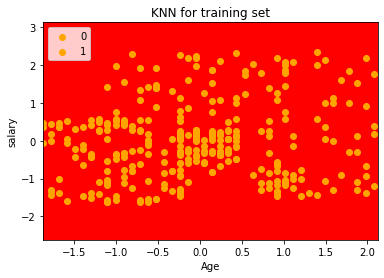

In [22]:
# Visualize the training set results

from matplotlib.colors import ListedColormap

x_set, y_set = x_train, y_train

#use meshgrid

x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 0, stop = x_set[:, 0].max() + 0, step = 0.25),
                     np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.25))

prob = classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape)

plt.contourf(x1, x2, prob, cmap = ListedColormap('red', 'green'))

plt.xlim(x1.min(), x1.max()) # avoid outliers
plt.ylim(x2.min(), x2.max())

for i, j in enumerate(np.unique(y_test)):
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], c = ListedColormap('orange', 'black')(i), label = j)

plt.title('KNN for training set')
plt.xlabel('Age')
plt.ylabel('salary')

plt.legend()
plt.show()